In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\titanic.csv")

In [3]:
print("===== 5 Data Pertama =====")
print(df.head())
print("\n===== 5 Data Terakhir =====")
print(df.tail())

===== 5 Data Pertama =====
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450  

In [4]:
print("\n===== Info Dataset =====")
print(df.info())
print("\n===== Shape Dataset =====")
print(f"Baris: {df.shape[0]}, Kolom: {df.shape[1]}")


===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

===== Shape Dataset =====
Baris: 891, Kolom: 12


In [5]:
print("\n===== Missing Values =====")
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, missing_percent], axis=1, keys=['Total', 'Persen'])
print(missing_data)


===== Missing Values =====
             Total    Persen
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
PassengerId      0  0.000000
Survived         0  0.000000
Pclass           0  0.000000
Name             0  0.000000
Sex              0  0.000000
SibSp            0  0.000000
Parch            0  0.000000
Ticket           0  0.000000
Fare             0  0.000000


In [6]:
print("\n===== Duplicate Values =====")
print(f"Total duplikat: {df.duplicated().sum()}")


===== Duplicate Values =====
Total duplikat: 0


In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df.drop('Cabin', axis=1, inplace=True)

df.dropna(subset=['Embarked'], inplace=True)

In [8]:
print("\n===== Deskripsi Statistik =====")
print(df.describe(include='all'))

categorical = ['Survived', 'Pclass', 'Sex', 'Embarked']
print("\n===== Frekuensi Kategorikal =====")
for col in categorical:
    print(f"\n{col}:")
    print(df[col].value_counts())


===== Deskripsi Statistik =====
        PassengerId    Survived      Pclass                     Name   Sex  \
count    889.000000  889.000000  889.000000                      889   889   
unique          NaN         NaN         NaN                      889     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.382452    2.311586                      NaN   NaN   
std      256.998173    0.486260    0.834700                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      224.000000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.000000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp

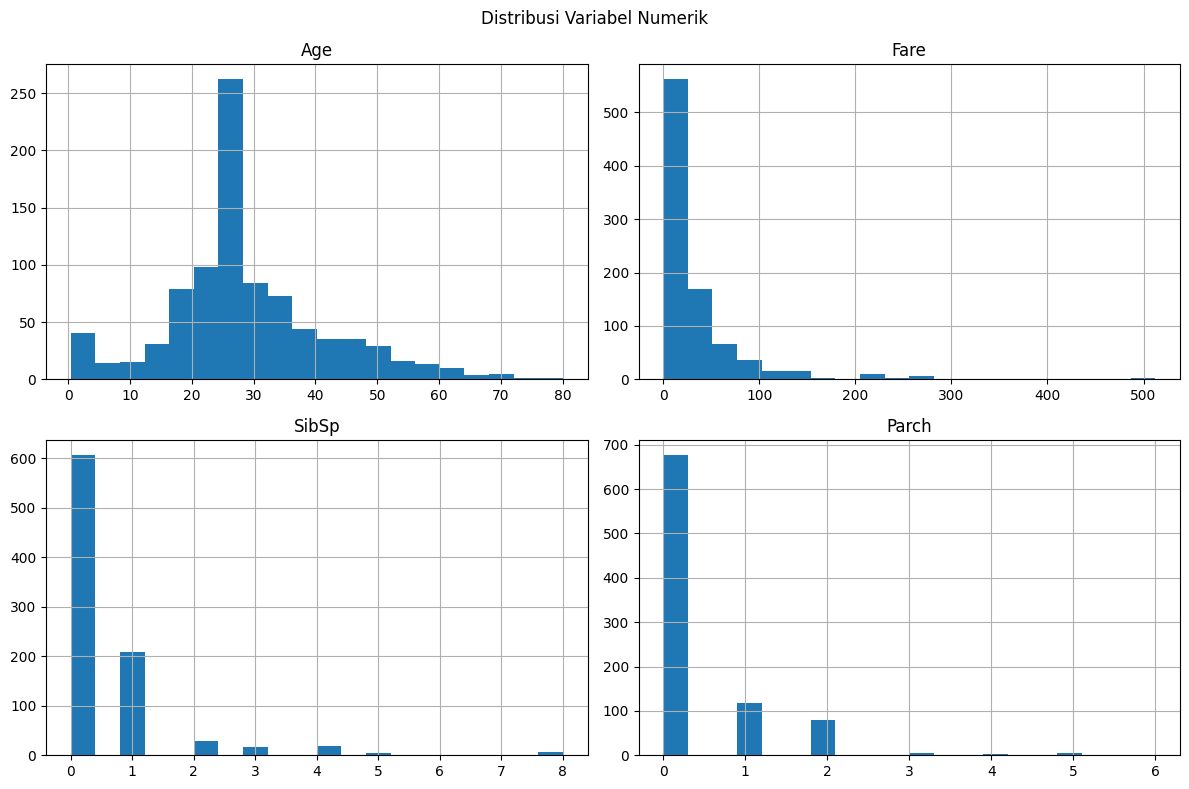

In [9]:
numerical = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical].hist(figsize=(12,8), bins=20)
plt.suptitle('Distribusi Variabel Numerik')
plt.tight_layout()
plt.show()

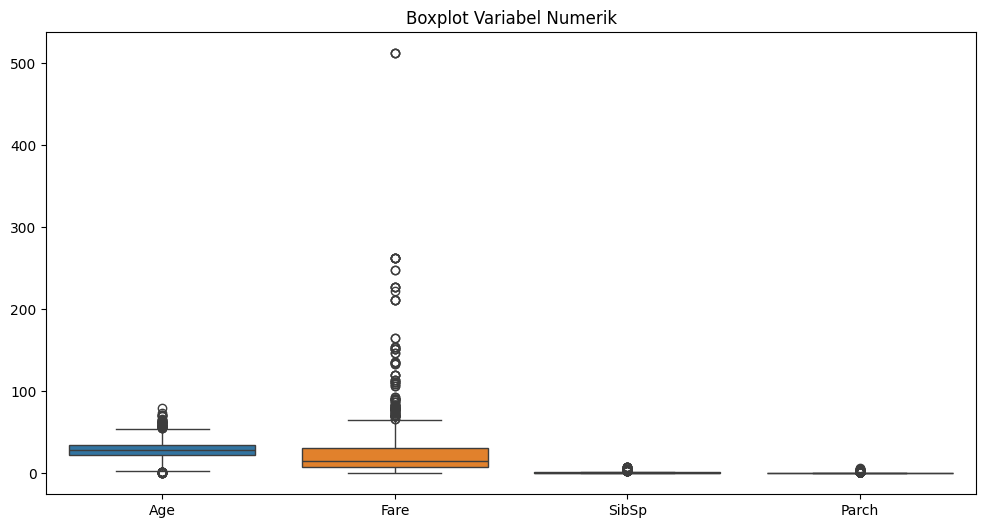

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical])
plt.title('Boxplot Variabel Numerik')
plt.show()

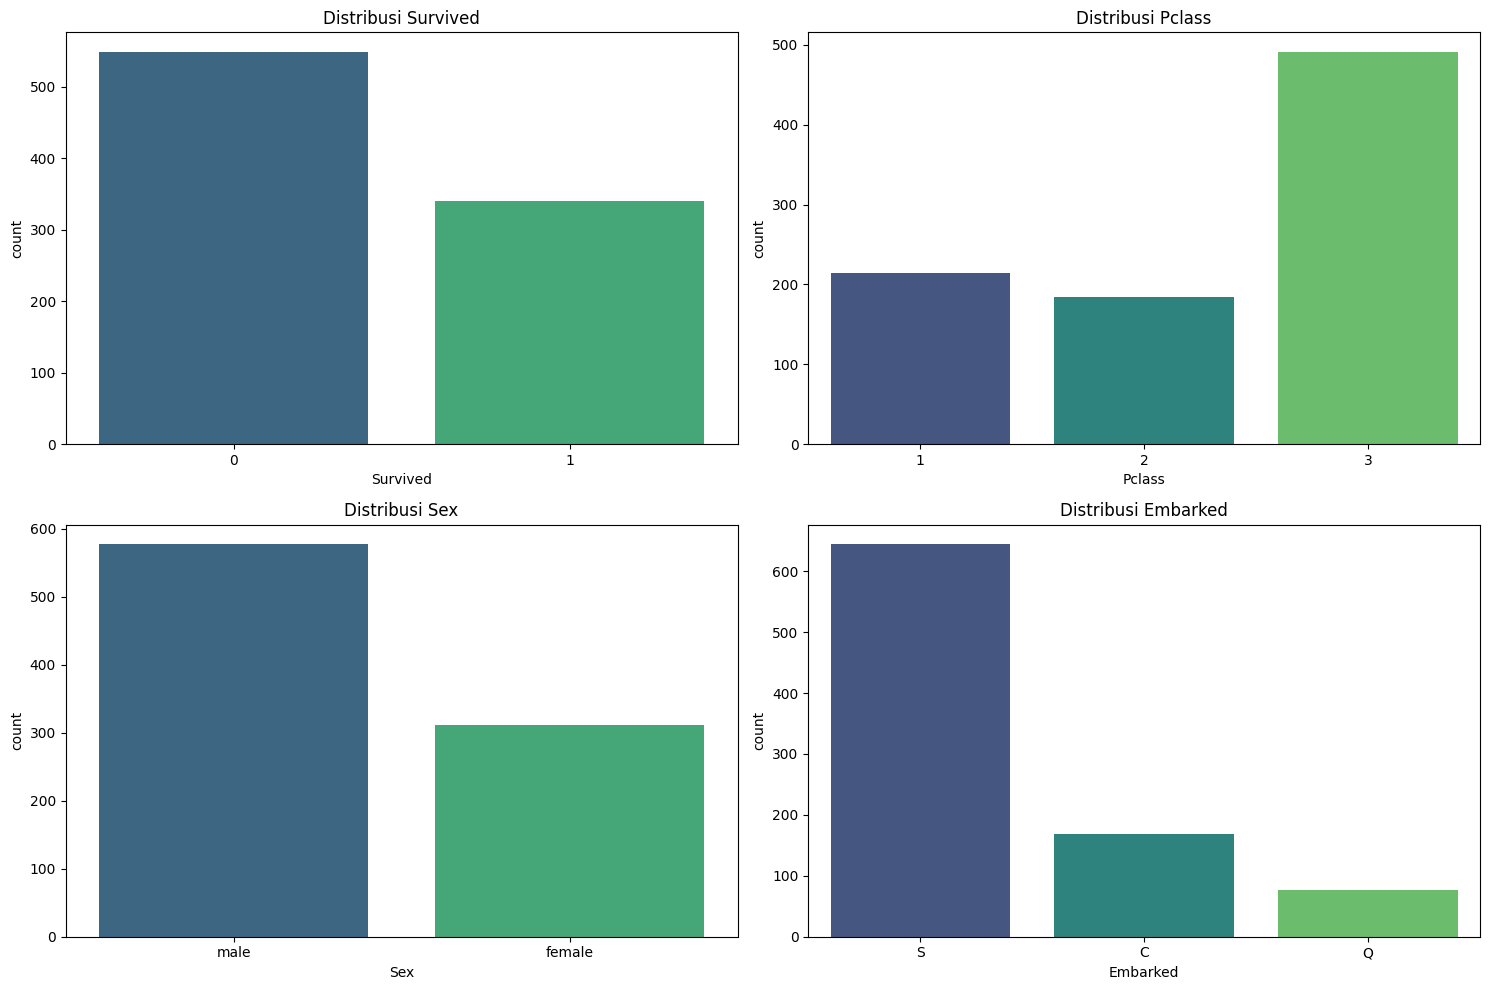

In [11]:
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical, 1):
    plt.subplot(2,2,i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

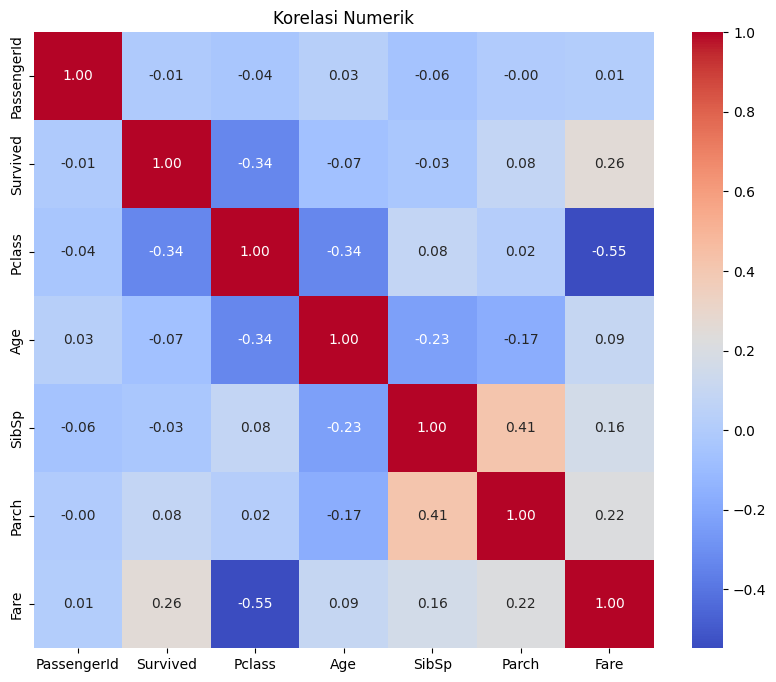

In [12]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Numerik')
plt.show()

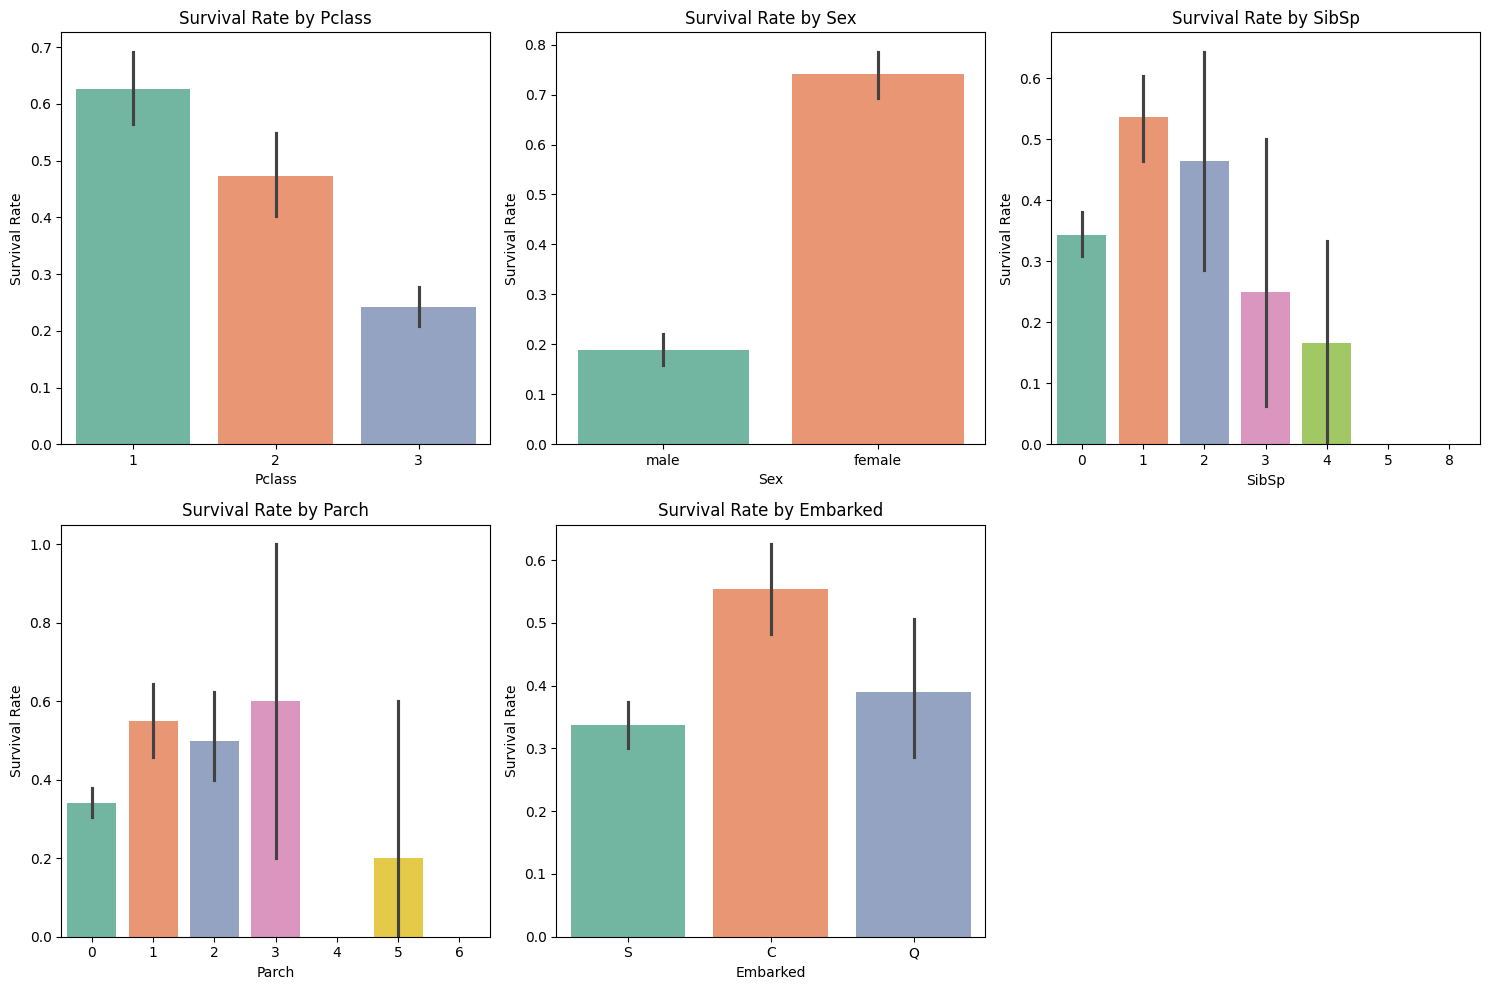

In [13]:
plt.figure(figsize=(15,10))
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for i, feature in enumerate(features, 1):
    plt.subplot(2,3,i)
    sns.barplot(data=df, x=feature, y='Survived', palette='Set2')
    plt.title(f'Survival Rate by {feature}')
    plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

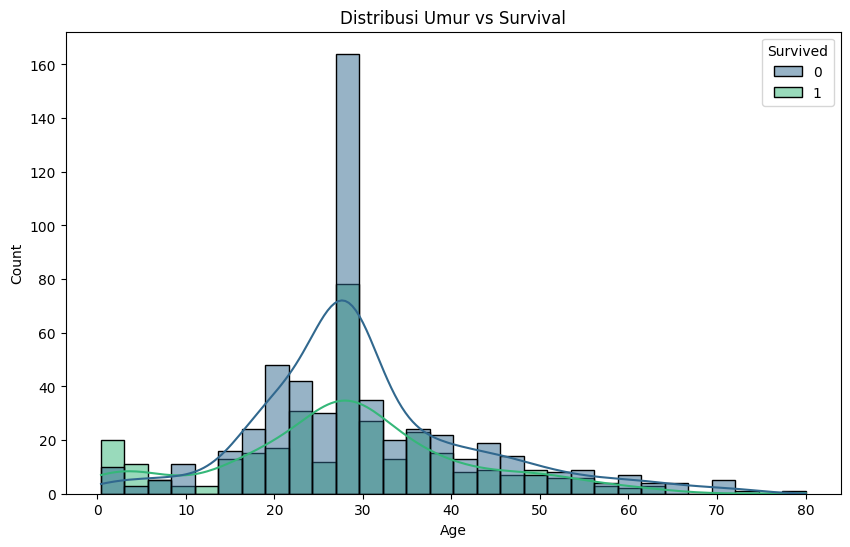

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='viridis')
plt.title('Distribusi Umur vs Survival')
plt.show()

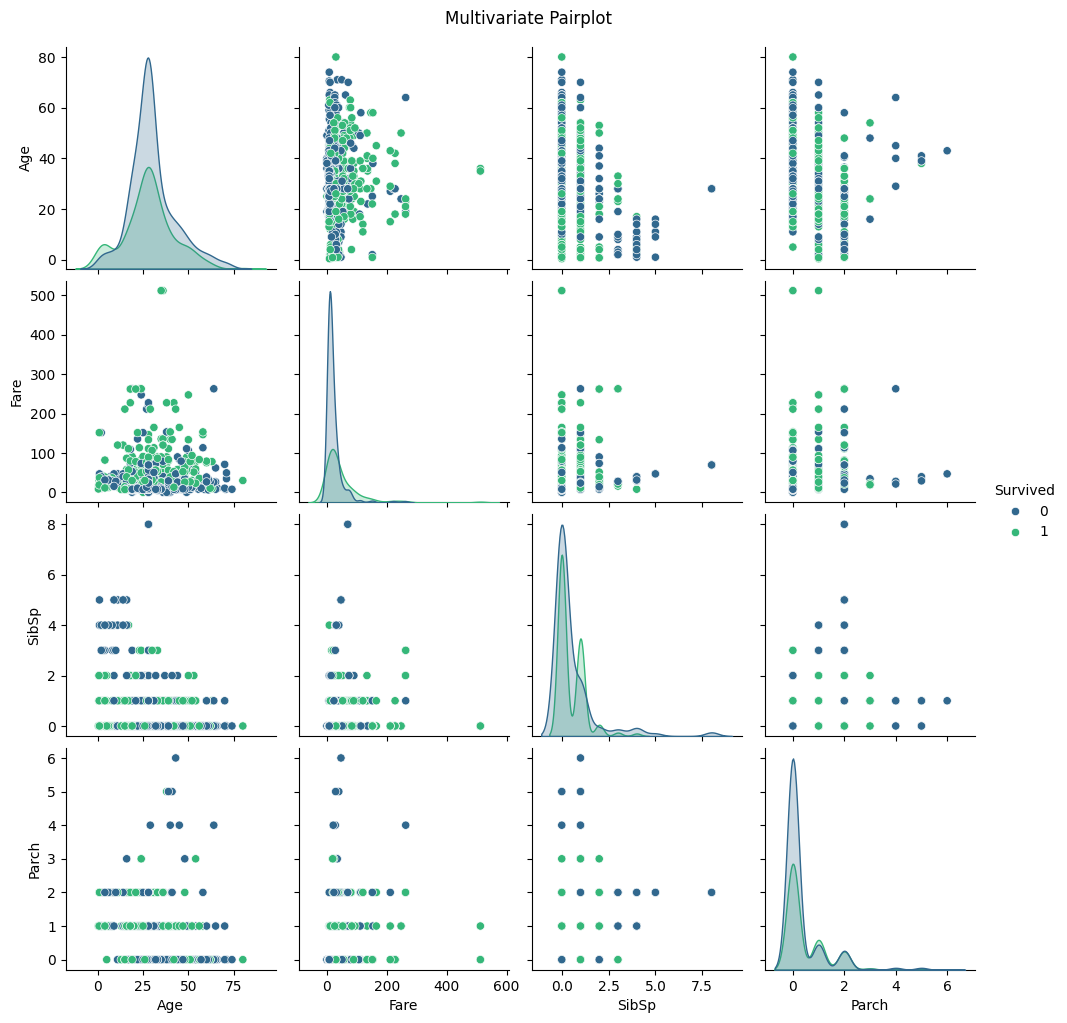

In [15]:
sns.pairplot(df[numerical + ['Survived']], hue='Survived', palette='viridis')
plt.suptitle('Multivariate Pairplot', y=1.02)
plt.show()

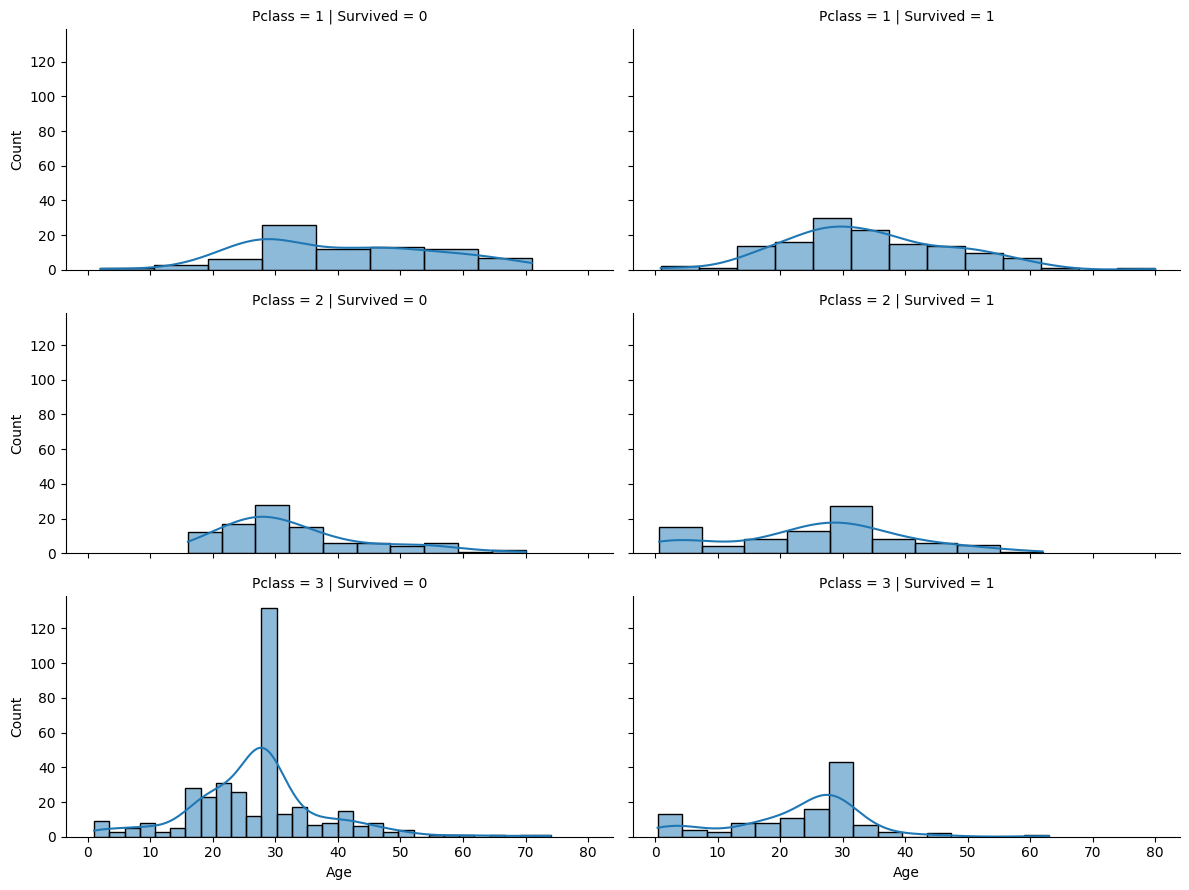

In [16]:
g = sns.FacetGrid(df, col='Survived', row='Pclass', height=3, aspect=2)
g.map(sns.histplot, 'Age', kde=True)
plt.show()

In [17]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [18]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0,12,18,35,60,100], 
                        labels=['Child','Teen','Young Adult','Adult','Senior'])

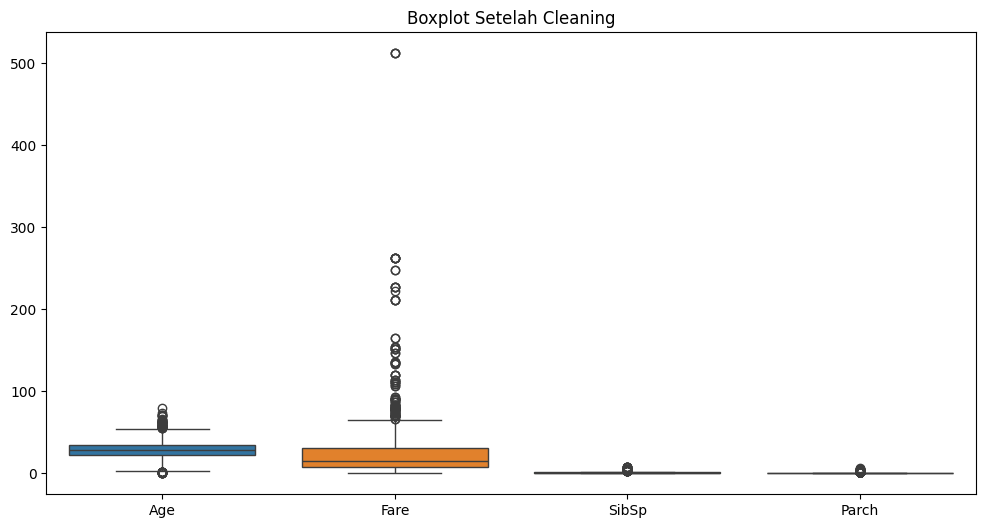

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical])
plt.title('Boxplot Setelah Cleaning')
plt.show()

In [20]:
z = np.abs(stats.zscore(df[numerical]))
outliers = (z > 3).any(axis=1)
print(f"Jumlah outlier: {outliers.sum()}")

Jumlah outlier: 71
